In [40]:
%run ../src/python/helpers.py

%matplotlib inline
from numpy import nan
from pandas import read_feather
import ipywidgets as w
from numpy import arange

data = read_feather("../data/aeolus_top5drugs.feather")

plot_settings()

## For a drug class and a subset of outcomes, how many reports are there?

In [41]:
cl = ['atc_1st','atc_2nd','atc_3rd','atc_4th','drug_concept_name']

d = dropdown(cl)
d

Dropdown(layout=Layout(display='flex', width='30%'), options=('atc_1st', 'atc_2nd', 'atc_3rd', 'atc_4th', 'dru…

classes in above chosen drug class

In [42]:
dclasses = freqXbyY(data,d.label,d.label).index.values

In [43]:
i = w.IntSlider(min=1,max=50,step=1,value=10)
i

IntSlider(value=10, max=50, min=1)

indices for most frequent ADRs

In [65]:
grp_num = int(i.value)//len(dclasses)
fin_num = int(i.value)*len(dclasses)
dat = data.groupby([d.label,out]).head(grp_num)

In [71]:
series = dat.groupby([d.label,out])[out].count().sort_values(ascending=False).head(fin_num)

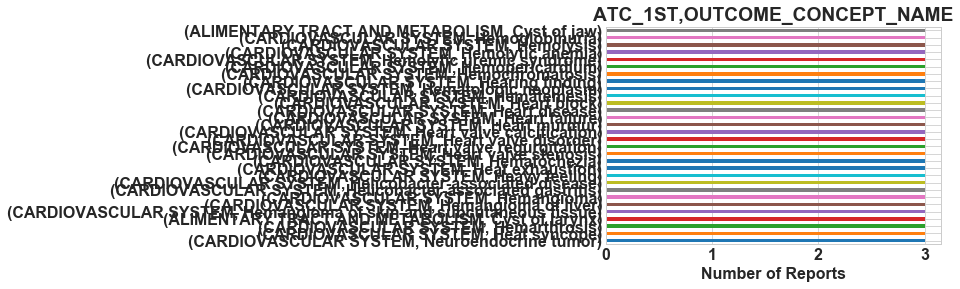

In [72]:
p = plot(series,kind='barh')
q = p.set_title(p.get_ylabel().upper(),rotation=0,weight='bold')
q = p.set_ylabel("")
q = p.set_xlabel("Number of Reports",weight="bold")

In [118]:
grpd = data.groupby([d.label,out])